In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

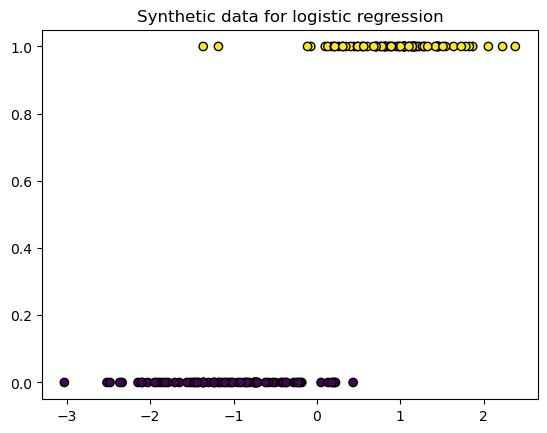

In [2]:
# Creating synthetic data for classification:
X, y = make_classification(n_samples=150, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Ploting the data:
plt.scatter(X, y, c=y, cmap="viridis", edgecolors='k')
plt.title("Synthetic data for logistic regression")
plt.show()

In [3]:
# Split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create the architecture for the logistic regression:
class LogisticReg:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Define sigmoid as for activation:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1)) # Start regression at 0
        self.bias = 0 # Start regression at 0

        y = y.reshape(m, 1)

        for epoch in range(self.epochs):
            # Linear output:
            z = np.dot(X, self.weights) + self.bias

            y_hat = self.sigmoid(z)

            # Cost function - derivated: binary cross entropy
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            # Updating the paramters:
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Binary cross entropy to evaluate the model:
            loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            print(f"Epoch: {epoch}, Loss: {loss:.4f}")

    def prob_prediction(self, X):
        z = np.dot(X, self.weights) + self.bias
        
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        prediction = self.prob_prediction(X)

        return (prediction >= threshold).astype(int) # [True | False] -> [1 | 0]

In [5]:
# Training:

model = LogisticReg(lr = 0.1, epochs=100)
model.fit(X_train, y_train)

Epoch: 0, Loss: 0.6931
Epoch: 1, Loss: 0.6708
Epoch: 2, Loss: 0.6499
Epoch: 3, Loss: 0.6305
Epoch: 4, Loss: 0.6123
Epoch: 5, Loss: 0.5954
Epoch: 6, Loss: 0.5796
Epoch: 7, Loss: 0.5649
Epoch: 8, Loss: 0.5511
Epoch: 9, Loss: 0.5381
Epoch: 10, Loss: 0.5260
Epoch: 11, Loss: 0.5146
Epoch: 12, Loss: 0.5039
Epoch: 13, Loss: 0.4939
Epoch: 14, Loss: 0.4844
Epoch: 15, Loss: 0.4755
Epoch: 16, Loss: 0.4670
Epoch: 17, Loss: 0.4590
Epoch: 18, Loss: 0.4515
Epoch: 19, Loss: 0.4443
Epoch: 20, Loss: 0.4375
Epoch: 21, Loss: 0.4311
Epoch: 22, Loss: 0.4250
Epoch: 23, Loss: 0.4191
Epoch: 24, Loss: 0.4136
Epoch: 25, Loss: 0.4083
Epoch: 26, Loss: 0.4032
Epoch: 27, Loss: 0.3984
Epoch: 28, Loss: 0.3938
Epoch: 29, Loss: 0.3894
Epoch: 30, Loss: 0.3852
Epoch: 31, Loss: 0.3811
Epoch: 32, Loss: 0.3772
Epoch: 33, Loss: 0.3735
Epoch: 34, Loss: 0.3699
Epoch: 35, Loss: 0.3665
Epoch: 36, Loss: 0.3632
Epoch: 37, Loss: 0.3600
Epoch: 38, Loss: 0.3570
Epoch: 39, Loss: 0.3540
Epoch: 40, Loss: 0.3512
Epoch: 41, Loss: 0.3484
Ep

In [9]:
# Predictions:
y_pred = model.predict(X_test)

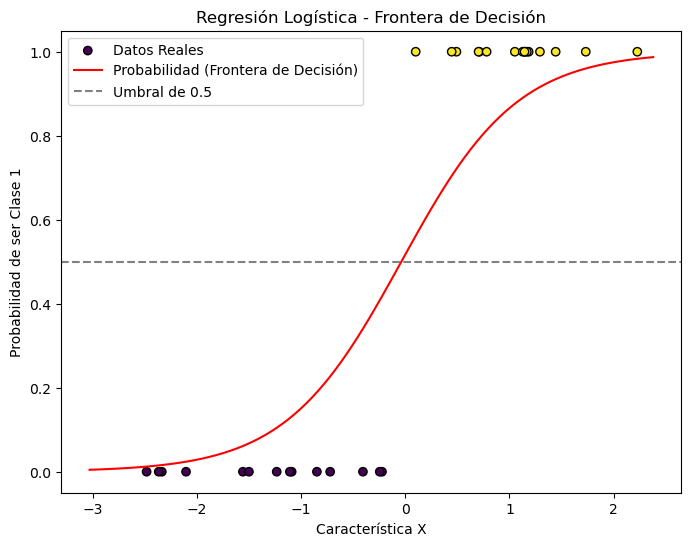

In [ ]:
# Visualization:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c=y_test, cmap='viridis', edgecolors='k', label='Datos Reales')
# Generate data for decision line:
x_values = np.linspace(X.min(), X.max(), 100)
y_values = model.prob_prediction(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label='Probabilidad (Frontera de Decisión)')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Umbral de 0.5')
plt.title('Regresión Logística - Frontera de Decisión')
plt.xlabel('Característica X')
plt.ylabel('Probabilidad de ser Clase 1')
plt.legend()
plt.show()